# Heading

#### Import Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_grid as altgrid
import numpy as np

In [3]:
alt.themes.register("grid", altgrid.theme)
alt.themes.enable("grid")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

---

## Read data

#### Migration trends from `migration` directory

In [5]:
migration_df = pd.read_csv(
    "../migration/data/processed/irs_migration_decade_net.csv",
    dtype={"fips": "str"},
)

In [6]:
migration_df.head()

,fips,county_name,state_abbr,left,arrived,net
0,04013,Maricopa County,AZ,530616,671812,141196
1,32003,Clark County,NV,291987,392234,100247
2,48453,Travis County,TX,425184,496981,71797
3,06065,Riverside County,CA,376481,437530,61049
4,12071,Lee County,FL,113530,168436,54906


#### Add population trends from the `census` directory

In [30]:
pop_df = pd.read_csv(
    "../census/data/processed/decennial_census_county_pop_1990-00-10-20.csv",
    dtype={"fips": "str", "state_fips": "str", "county_fips": "str"},
)

In [31]:
pop_df.head()

,state_fips,county_fips,county_name,state_name,ap_name,1990,2000,2010,2020,change_1990_2020,change_2000_2020,change_2010_2020,fips
0,08,035,Douglas County,Colorado,Colo.,60391.0,175766.0,285465.0,357978.0,492.77,103.67,25.40,08035
1,13,117,Forsyth County,Georgia,Ga.,44083.0,98407.0,175511.0,251283.0,470.02,155.35,43.17,13117
2,51,107,Loudoun County,Virginia,Va.,86129.0,169599.0,312311.0,420959.0,388.75,148.21,34.79,51107
3,48,491,Williamson County,Texas,Texas,139551.0,249967.0,422679.0,609017.0,336.41,143.64,44.08,48491
4,46,083,Lincoln County,South Dakota,S.D.,15427.0,24131.0,44828.0,65161.0,322.38,170.03,45.36,46083


#### Merge population and migration

In [32]:
mig_pop_df = pd.merge(migration_df, pop_df, on=["fips", "county_name"])

#### Migration as share of population

In [33]:
mig_pop_df["net_pct_pop"] = (mig_pop_df["net"] / mig_pop_df["2020"]) * 100

In [46]:
mig_pop_df.sort_values("change_1990_2020", ascending=False).head()

,fips,county_name,state_abbr,left,arrived,net,state_fips,county_fips,state_name,ap_name,1990,2000,2010,2020,change_1990_2020,change_2000_2020,change_2010_2020,net_pct_pop
34,08035,Douglas County,CO,84523,104874,20351,08,035,Colorado,Colo.,60391.0,175766.0,285465.0,357978.0,492.77,103.67,25.40,5.684986
40,13117,Forsyth County,GA,36514,52704,16190,13,117,Georgia,Ga.,44083.0,98407.0,175511.0,251283.0,470.02,155.35,43.17,6.442935
35,51107,Loudoun County,VA,79581,99442,19861,51,107,Virginia,Va.,86129.0,169599.0,312311.0,420959.0,388.75,148.21,34.79,4.718037
6,48491,Williamson County,TX,129075,179698,50623,48,491,Texas,Texas,139551.0,249967.0,422679.0,609017.0,336.41,143.64,44.08,8.312247
136,46083,Lincoln County,SD,13943,19212,5269,46,083,South Dakota,S.D.,15427.0,24131.0,44828.0,65161.0,322.38,170.03,45.36,8.086125


---

#### Damage estimates from `01-climate-change-damage`

In [35]:
damage_df = pd.read_csv(
    "data/processed/climate-change-damage-estimates.csv",
    dtype={"county_fips_code": str},
).rename(columns={"county_fips_code": "fips"})

In [36]:
damage_df.head()

,state_code,county_name,fips,county_population_in_2012,county_income_in_2012,5th_percentile_damages,17th_percentile_damages,median_damages,83rd_percentile_damages,95th_percentile_damages
0,FL,Union County,12125,15239,17249,11.3580,17.516001,27.943001,45.268002,61.369999
1,FL,DeSoto County,12027,34745,20798,14.1640,17.632999,23.632999,33.765999,43.431999
2,FL,Hernando County,12053,173100,31202,11.9270,16.339001,23.563999,39.046001,51.025002
3,FL,Dixie County,12029,16063,22932,9.3362,13.878000,21.292000,34.236000,47.027000
4,TX,Zavala County,48507,11996,21930,11.9800,15.423000,21.072001,28.188999,37.020000


---

## Merge

#### Damage estimates vs. pop growth

In [37]:
df = pd.merge(
    mig_pop_df,
    damage_df,
    on=["fips", "county_name"],
)

In [38]:
df.head()

,fips,county_name,state_abbr,left,arrived,net,state_fips,county_fips,state_name,ap_name,1990,2000,2010,2020,change_1990_2020,change_2000_2020,change_2010_2020,net_pct_pop,state_code,county_population_in_2012,county_income_in_2012,5th_percentile_damages,17th_percentile_damages,median_damages,83rd_percentile_damages,95th_percentile_damages
0,04013,Maricopa County,AZ,530616,671812,141196,04,013,Arizona,Ariz.,2122101.0,3072149.0,3817117.0,4420568.0,108.31,43.89,15.81,3.194069,AZ,3942900,40424,3.3767,5.1159,7.7618,11.181000,14.2900
1,32003,Clark County,NV,291987,392234,100247,32,003,Nevada,Nev.,741459.0,1375765.0,1951269.0,2265461.0,205.54,64.67,16.10,4.425015,NV,1998600,38713,2.8945,4.6669,6.8005,9.635400,12.4160
2,48453,Travis County,TX,425184,496981,71797,48,453,Texas,Texas,576407.0,812280.0,1024266.0,1290188.0,123.83,58.84,25.96,5.564848,TX,1097100,52285,2.9998,3.9860,5.6715,7.614400,9.8619
3,06065,Riverside County,CA,376481,437530,61049,06,065,California,Calif.,1170413.0,1545387.0,2189641.0,2418185.0,106.61,56.48,10.44,2.524579,CA,2268000,31879,3.4363,5.9797,9.0895,13.558000,17.9310
4,12071,Lee County,FL,113530,168436,54906,12,071,Florida,Fla.,335113.0,440888.0,618754.0,760822.0,127.03,72.57,22.96,7.216668,FL,644990,40248,7.9112,10.3420,14.1650,21.306999,28.1420


#### Correlation between net migration and damages? 

In [40]:
df[["state_code", "county_name", "95th_percentile_damages", "change_1990_2020"]].corr()

,95th_percentile_damages,change_1990_2020
95th_percentile_damages,1.000000,-0.085558
change_1990_2020,-0.085558,1.000000


#### Questions

In [18]:
# In the places with the highest risk or damage assessment, how many are growing?
# In the places with the lowest risk or damage assessment, how many are growing?

In [44]:
df.sort_values("change_1990_2020", ascending=False).head(50)[
    "95th_percentile_damages"
].mean()

10.387430831400001

In [43]:
df.sort_values("change_1990_2020", ascending=False).tail(50)[
    "95th_percentile_damages"
].mean()

18.73417394778

---

## Geography

#### Counties shapefile

In [21]:
gdf_src = gpd.read_file("data/raw/geo/geo.shp")

In [22]:
gdf = gdf_src[
    [
        "STCOFIPS",
        "COUNTY",
        "COUNTYTYPE",
        "STATE",
        "geometry",
    ]
].copy()

In [23]:
gdf.columns = gdf.columns.str.lower()

<AxesSubplot:>

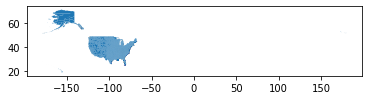

In [24]:
gdf.plot()

In [25]:
gdf

,stcofips,county,countytype,state,geometry
0,21115,Johnson,County,Kentucky,"POLYGON ((-82.61240 37.87928, -82.61688 37.877..."
1,21117,Kenton,County,Kentucky,"POLYGON ((-84.50617 39.09518, -84.50333 39.091..."
2,21119,Knott,County,Kentucky,"POLYGON ((-82.94855 37.50317, -82.94733 37.501..."
3,21121,Knox,County,Kentucky,"POLYGON ((-83.58953 36.95579, -83.58949 36.954..."
4,21123,Larue,County,Kentucky,"POLYGON ((-85.52129 37.55435, -85.52019 37.553..."
...,...,...,...,...,...
3137,56037,Sweetwater,County,Wyoming,"POLYGON ((-109.04388 42.26369, -108.87568 42.2..."
3138,56039,Teton,County,Wyoming,"POLYGON ((-110.05319 44.00803, -110.05365 43.8..."
3139,56041,Uinta,County,Wyoming,"POLYGON ((-110.04801 41.57802, -110.04909 41.3..."
3140,56043,Washakie,County,Wyoming,"POLYGON ((-107.14682 44.16567, -107.12860 44.1..."


---

## Merge

In [26]:
df_merged = gpd.GeoDataFrame(pd.merge(df, gdf, left_on="fips", right_on="stcofips"))

---

## Exports

#### Geo file

In [27]:
df_merged.to_file(
    "data/processed/migration_climate_damage_counties.geojson", driver="GeoJSON"
)

/Users/stiles/.pyenv/versions/3.9.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [28]:
df_merged.head(100).to_file(
    "data/processed/migration_climate_damage_counties_top100.geojson", driver="GeoJSON"
)

/Users/stiles/.pyenv/versions/3.9.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [29]:
df_merged.tail(100).to_file(
    "data/processed/migration_climate_damage_counties_bottom100.geojson",
    driver="GeoJSON",
)

/Users/stiles/.pyenv/versions/3.9.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
